In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [15]:
import os
from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()

a=api.dataset_download_files('aemyjutt/salary-binary-classifier')
# KaggleApi를 통해 carlmbrideellis/llm-7-prompt-training-dataset을 불러온다.

import zipfile

zip_path = 'C:/Users/USER/Desktop/오픈소스/salary-binary-classifier.zip'  # 압축 파일 경로
extract_path = 'C:/Users/USER/Desktop/오픈소스'  # 압축 해제 경로

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [16]:
df = pd.read_csv('salary.csv')
df['label'] = np.where(df['salary'] == ' <=50K', 1, 0)
df1 = df.drop(columns=['salary','workclass','education','sex','marital-status','relationship','race','native-country','occupation'])

df1


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,label
0,39,77516,13,2174,0,40,1
1,50,83311,13,0,0,13,1
2,38,215646,9,0,0,40,1
3,53,234721,7,0,0,40,1
4,28,338409,13,0,0,40,1
...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,1
32557,40,154374,9,0,0,40,0
32558,58,151910,9,0,0,40,1
32559,22,201490,9,0,0,20,1


In [17]:
df1['age'] = pd.to_numeric(df['age'], errors='coerce')
a = df1.groupby('age').mean()

a

,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,label
age,,,,,,
17,185722.232911,6.648101,109.691139,41.751899,21.367089,1.000000
18,193530.207273,8.152727,102.058182,44.336364,25.912727,1.000000
19,204803.543539,9.096910,92.092697,43.915730,30.678371,0.997191
20,198537.705179,9.345286,82.786189,33.298805,32.280212,1.000000
21,200116.997222,9.434722,204.625000,51.636111,34.034722,0.995833
...,...,...,...,...,...,...
85,126667.333333,10.333333,0.000000,0.000000,29.333333,1.000000
86,149912.000000,14.000000,0.000000,0.000000,40.000000,1.000000
87,90338.000000,9.000000,0.000000,0.000000,2.000000,1.000000


In [18]:
df1['age'] = pd.to_numeric(df['age'], errors='coerce')
a = df1.groupby('age').sum()

a

,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,label
age,,,,,,
17,73360282,2626,43328,16492,8440,395
18,106441614,4484,56132,24385,14252,550
19,145820123,6477,65570,31268,21843,710
20,149498892,7037,62338,25074,24307,753
21,144084238,6793,147330,37178,24505,717
...,...,...,...,...,...,...
85,380002,31,0,0,88,3
86,149912,14,0,0,40,1
87,90338,9,0,0,2,1


In [19]:
df1['age'] = pd.to_numeric(df['age'], errors='coerce')
a = df1.groupby('age').var()

a

,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,label
age,,,,,,
17,1.123052e+10,0.832706,2.967195e+06,67369.176868,100.420742,0.000000
18,1.276830e+10,2.202497,2.185006e+06,70299.360242,137.671787,0.000000
19,1.355470e+10,1.873858,1.996265e+06,75180.203859,146.873906,0.002805
20,1.146532e+10,1.779556,1.644626e+06,59530.140650,137.513132,0.000000
21,1.127857e+10,2.168195,1.407040e+07,91116.788124,144.970976,0.004155
...,...,...,...,...,...,...
85,1.232053e+09,5.333333,0.000000e+00,0.000000,576.333333,0.000000
86,NaN,NaN,NaN,NaN,NaN,NaN
87,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df = pd.read_csv('salary.csv')
df['label'] = np.where(df['salary'] == ' <=50K', 1, 0)
df = df.drop(columns=['salary'])

df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,1
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,0
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,1
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  label           32561 non-null  int32 
dtypes: int32(1), int64(6), object(8)
memory usage: 3.6+ MB


In [22]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,1
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,0
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,1
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,1


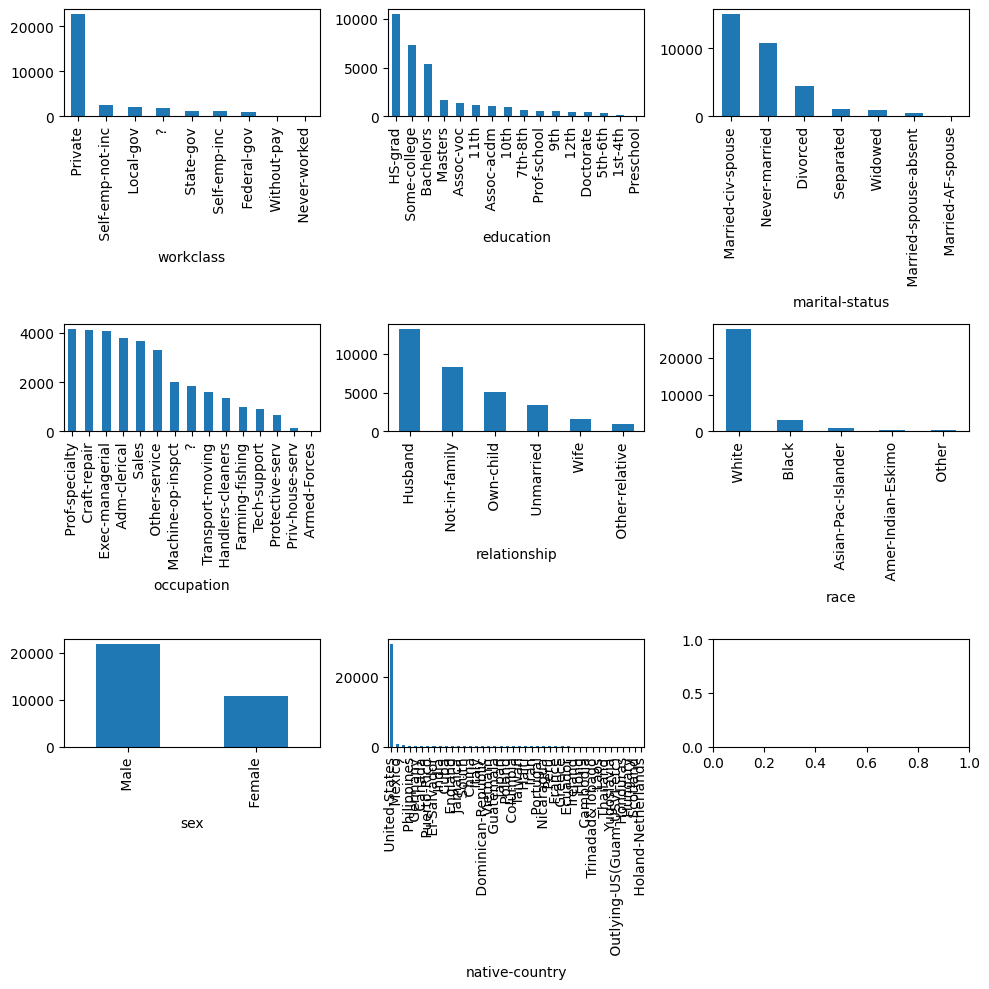

In [23]:
fig,axes = plt.subplots(nrows=3, ncols=3, figsize=(10,10))
for col, ax in zip(df.select_dtypes(include='O'), axes.ravel()):
    df[col].value_counts().plot.bar(ax=ax)
plt.tight_layout()
plt.show()

In [32]:
plt.figure(figsize=(12,5))
sns.barplot(x=df['workclass'],y=df['hours-per-week'],hue=df['label'])
grid()
plt.show()

KeyError: 'workclass'

<Figure size 1200x500 with 0 Axes>

In [ ]:

# 문자열 열을 찾아내어 원핫인코딩
string_columns = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=string_columns, dtype=int)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])

# 데이터를 특성과 레이블로 나누기
X_train = train_df.drop(columns=['label'])
y_train = train_df['label']
X_test = test_df.drop(columns=['label'])
y_test = test_df['label']

In [ ]:
# 모델 초기화 및 훈련
model = LogisticRegression(C=0.1)
model.fit(X_train, y_train)

LogisticRegression(C=0.1)

In [ ]:
# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# 분류 보고서 출력
print("Classification Report:")
print(classification_report(y_test, y_pred))

Test Accuracy: 79.76%
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.26      0.38      1568
           1       0.80      0.97      0.88      4945

    accuracy                           0.80      6513
   macro avg       0.76      0.61      0.63      6513
weighted avg       0.79      0.80      0.76      6513

